In [1]:
include("../ConductionModel.jl");
using Plots, VegaLite, LaTeXStrings, QuadGK
import PyPlot

In [9]:
semiconductor = Semiconductor(
    1.38 * 10^-23,
    1.6*10^-19,
    10^7,
    0.1 * 1.6*10^-19,
    2.1 * 10^18,
    2.1 * 10^18,
    0.1 * 1.6 * 10^-19,
    -10^3,
    10^13,
    -10.0,
    2.7,
    2.7
);

range = -10:0.2:10
res_VRH = map(x -> electronMobility(semiconductor, RnnVRH, x, 300), range);
res_PERCO = map(x -> electronMobility(semiconductor, RnnPercoField, x, 300), range);

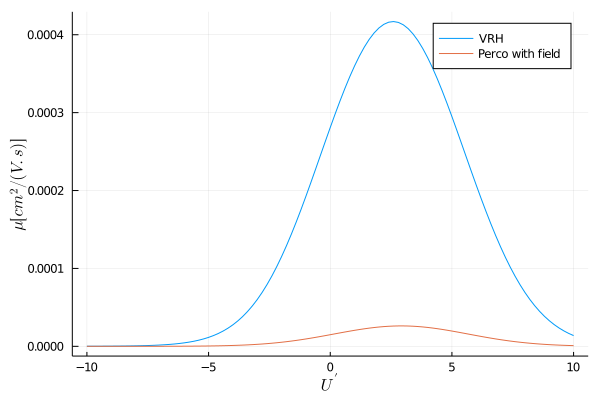

In [14]:
plot(range, [res_VRH, res_PERCO], xlabel=L"U^\prime", ylabel=L"\mu[cm^2/(V.s)]", label=["VRH"  "Perco with field"])

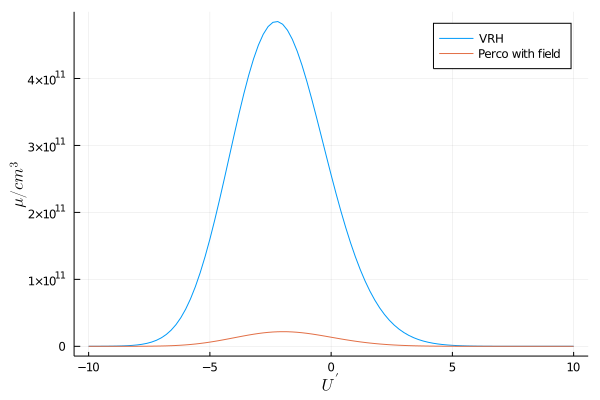

In [16]:
pondered_VRH = res_VRH .* map(x -> DOS(semiconductor, x, 300) * F(semiconductor, x, 300) * semiconductor.k * 300, range);
pondered_PERCO = res_PERCO .* map(x -> DOS(semiconductor, x, 300) * F(semiconductor, x, 300) * semiconductor.k * 300, range);

plot(range, [pondered_VRH, pondered_PERCO], xlabel=L"U^\prime", ylabel=L"\mu / cm^3", label=["VRH" "Perco with field"])